# Part I - (Airline on-time performance)
## by (Ahad Alotaibi)

## Introduction
> The data: The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigab ytes when uncompressed. I will work on analysis Data from 2004 year to 2008 year



## Preliminary Wrangling

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import matplotlib.patches as mpatches
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

> Load in your dataset and describe its properties through the questions below.

In [ ]:
# load in the dataset into a pandas dataframe
#Read CSV files for year 2008
df2008=pd.read_csv('2008.csv')

I face issue with RAM so , i will work in one file  2008 

In [ ]:
#Checking what dfdata looks like
df2008.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [ ]:
#Getting number of rows and columns of appended data table to see structure
df2008.shape

(2389217, 29)

In [ ]:
df2008.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

### What is the structure of your dataset?

> The dataset have 29 columns and 2389217 record 

### What is/are the main feature(s) of interest in your dataset?

> The main features are factors that are responsible for causing delays and cancellations. These will be used to gauge the on time performance and characteristics of flights from different destinations to identify the influencing and causing factors

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features of interest are factors that are attributed to delays in arrival and departure (given in time, minutes) and cancellation codes and reasons. We can tie these up to flight carriers,the month of years and destination see if we can spot patterns and relationships.

In [ ]:
#Lets first create a function that will rename x,y axis and chart title. We can re-use this function since we will be doing a lot of plots.

def chart_labels(x_label,title,y_label):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

## Univariate Exploration

> This section explores univariate data to see what their distributions look like. Every section has a question associated with it and every plot is followed by analysis of the question.





1 ) Which cancellation reason is most common?

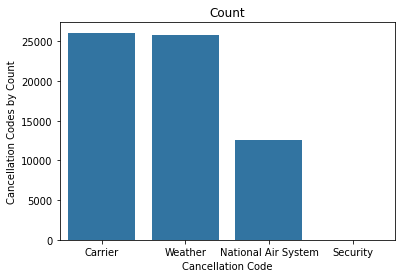

In [ ]:
#Getting distribution using Seaborn bar plot 
#Define Plot
base_color=sb.color_palette()[0]
g=sb.countplot(data=df2008,x='CancellationCode',color=base_color,order=['A','B','C','D'])
chart_labels('Cancellation Code','Count','Cancellation Codes by Count')
g.set_xticklabels(['Carrier','Weather','National Air System','Security']);

> From the graph above, it is clear that 'A' (Carrier) and 'B' (Weather) are the highest reasons for flight cancellations

> There was no flight cancellation due to security in 2008.

2) Which carrier had the most cancellations ?

Once we have looked at the top reasons for cancellations, we can move on to see which carrier had the most cancellations. This can be observed by a bar plot for carrier codes for which flights were cancelled.

In [ ]:
#Getting a subset of original dataframe that contains only cancellation data
Cancellation_data=df2008.query('CancellationCode in ["A","B","C","D"]')

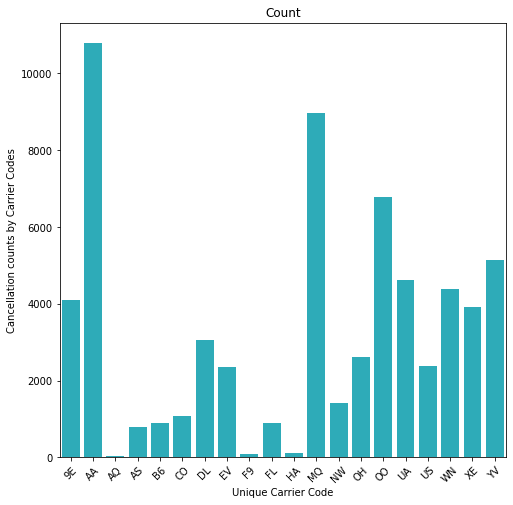

In [ ]:
#Getting distribution of carriers that had most cancellations
#Saving value counts for various carriers 
carriers_cancellations=Cancellation_data.UniqueCarrier.value_counts().sort_index()
#Define Plot
base_color=sb.color_palette()[9]
plt.figure(figsize=(8,8))
g=sb.countplot(data=Cancellation_data,x='UniqueCarrier',order=carriers_cancellations.index,color=base_color)
g.set_xticklabels(labels=carriers_cancellations.index,rotation=45)
chart_labels('Unique Carrier Code','Count','Cancellation counts by Carrier Codes')

> The highest number of canceled flights for the carrier is  AA(American Airlines), MQ(Envoy Air), OO(SkyWest Airlines) are the top three carriers with highest cancellations. These cancellations include all four types (A,B,C,D).

3 ) Which month of the year had most cancellations?

Moving onto the time factor, lets try to understand which months have the most cancellations for all four years.

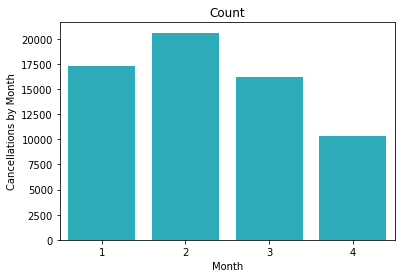

In [ ]:
#Define Plot
month_order=Cancellation_data.Month.value_counts().sort_index()
sb.countplot(data=Cancellation_data,x='Month',color=base_color,order=month_order.index)
chart_labels('Month','Count','Cancellations by Month');

> February, January and March had most cancellations.

4 ) What does the distribution of arrival delays look like?

Now, lets take a look at arrival delays by day of the month. We will use a histogram.

In [ ]:
#Filtering only data with arrival_delay information, excluding NaN
df_arrival_delay=df2008[df2008.ArrDelay.notnull()]

We will plot a histogram of arrival delays. Since most of the data is concentrated between -50 and 300 we will set the x limits accordingly.

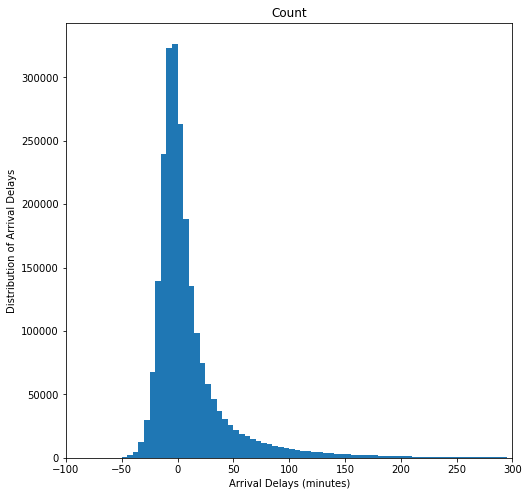

In [ ]:
#Define plot
plt.figure(figsize=(8,8))
bin_edges=np.arange(-50,300,5)
plt.hist(df_arrival_delay.ArrDelay,bins=bin_edges)
plt.xlim(-100,300)
chart_labels('Arrival Delays (minutes)','Count','Distribution of Arrival Delays')

> From the histogram we can see that most of the delays are concentrated between 0 and 50 minutes. The distribution is skewed to the right.

5 ) What does the distribution of departure delays look like?

Now, lets take a look at the distribution of departure delays.

In [ ]:
#Filtering only data with arrival_delay information, excluding NaN
df_depart_delay=df2008[df2008.DepDelay.notnull()]

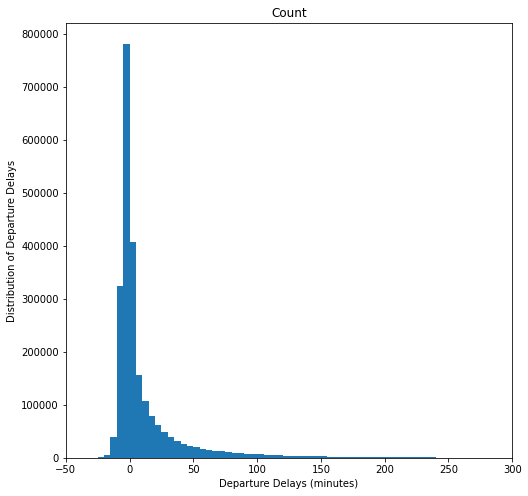

In [ ]:
#Define plot
plt.figure(figsize=(8,8))
bin_edges=np.arange(-50,300,5)
plt.hist(df_depart_delay.DepDelay,bins=bin_edges)
plt.xlim(-50,300)
chart_labels('Departure Delays (minutes)','Count','Distribution of Departure Delays')

> The histogram above shows the distribution of departure delays. From the graph, it can be observed that most of the delays are between 0 and 50. The graph is skewed to the right.

6 ) Which carriers had the highest delays at arrivals?

Now, lets take a look at on time performance of flights by carriers (based on arrival delays)

In [ ]:
#Group by carrier codes and get sum of delayes for each carrier
delays_carrier=df_arrival_delay.groupby('UniqueCarrier').ArrDelay.sum().sort_index()

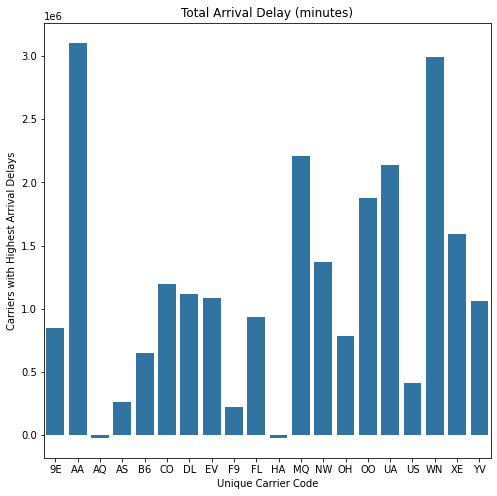

In [ ]:
#Define bar plot
plt.figure(figsize=(8,8))
base_color=sb.color_palette()[0]
sb.barplot(x=delays_carrier.index,y=delays_carrier.values,color=base_color,order=delays_carrier.index)
chart_labels('Unique Carrier Code','Total Arrival Delay (minutes)','Carriers with Highest Arrival Delays')

> From the plot it can be seen that American Airlines has the highest arrival delays.

In the graphs above, we explored cancellation codes, carrier codes with cancellations and time of the year when cancellations were hightest.

Cancellation code "D" (Security) is very less as compared to other codes. This means there have been very few instances of delays/cancellations due to security reasons.

We also explored delays in departure and arrival of flights to understand their distribution. We had to transform the histogram for these by placing limits on x axis since most of the data is concentrated there.

To explore the carriers that had cancellations, we modified the original dataset and filtered only those rows that had cancellations (A,B,C or D). We would then be able to determine and observe cancellations by carriers.

To explore delays, we created new dataframes that excluded NaN (missing) values in delays to plot histogram.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).


7 ) For each cancellation code (reason) which month had the most cancellations? Does this information convey anything about seasons?

This is an extension of the univariate plot where we were trying to see which months had most cancellations.

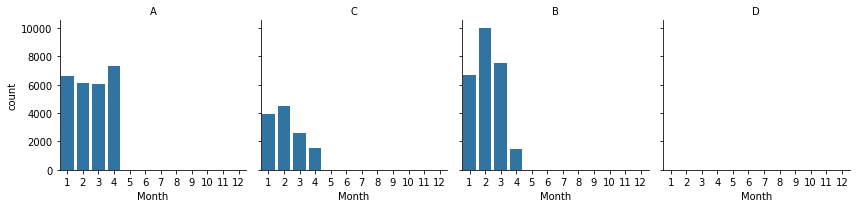

In [ ]:
#Define plot
month_order=[1,2,3,4,5,6,7,8,9,10,11,12]
g=sb.FacetGrid(data=Cancellation_data,col='CancellationCode')
g.map(sb.countplot,'Month',order=month_order)
g.set_titles("{col_name}");

> The plot above for "B" shows that the months of January, February and March had most cancellations. This can be due to bad weather (Since "B" is cancellations due to weather) but we will explore more plots on this later.

8) What is the relationship between departure and arrival delays?

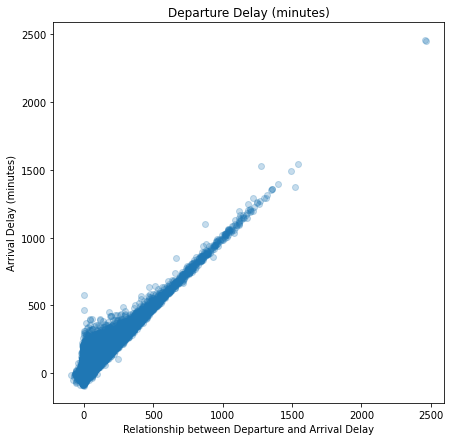

In [ ]:
#Define plot
plt.figure(figsize=(7,7))
plt.scatter(data=df2008.query('Cancelled==0'),x='DepDelay',y='ArrDelay',alpha=1/4)
chart_labels('Relationship between Departure and Arrival Delay','Departure Delay (minutes)','Arrival Delay (minutes)')

> The plot above shows a linear relationship between departure and arrival delays.

9) What is the relationship between Carrier delay and taxi out time?

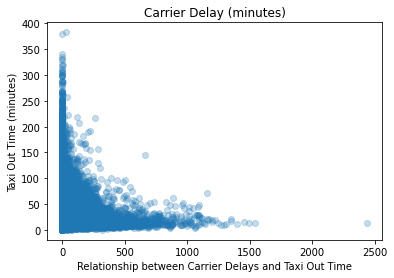

In [ ]:
#Define plot
plt.scatter(data=df2008.query('Cancelled==0'),x='CarrierDelay',y='TaxiOut',alpha=1/4)
chart_labels('Relationship between Carrier Delays and Taxi Out Time','Carrier Delay (minutes)','Taxi Out Time (minutes)')

> There is no linear relationship between Carrier Delay delay and taxi out time.

10 ) What is the relationship between flight distances and mean arrival delay?

In [ ]:
#Pandas series with average arrival delay by distance
distance_arrival=df2008.query('ArrDelay>0').groupby('Distance')['ArrDelay'].mean()

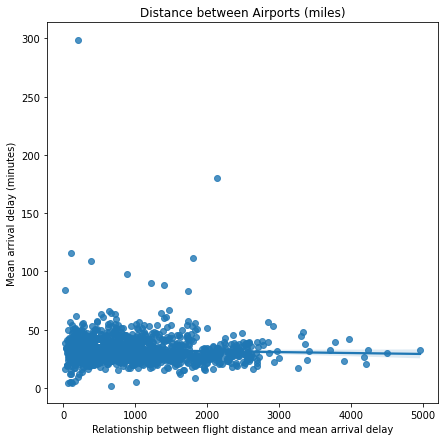

In [ ]:
plt.figure(figsize=(7,7))

#Converting the series for seaborn plotting
x,y=pd.Series(distance_arrival.index,name='distance'),pd.Series(distance_arrival.values,name='avg_arrival_delay')
sb.regplot(x=x,y=y)
chart_labels('Relationship between flight distance and mean arrival delay','Distance between Airports (miles)','Mean arrival delay (minutes)')

> From the graph above, we can see that there is no increasing or decreasing trend in average delay as the distance between airports increases.



11 ) What is the relationship between Day Of Week and Departure Delay?

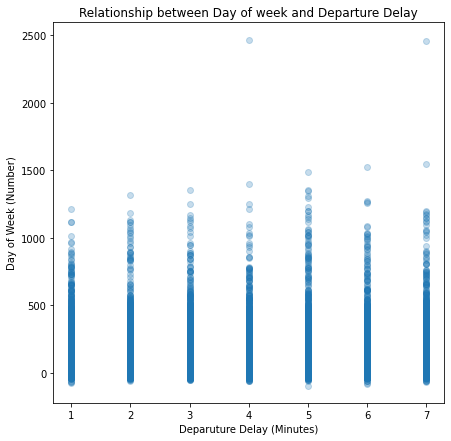

In [ ]:
#Define plot
plt.figure(figsize=(7,7))
plt.scatter(data=df2008.query('Cancelled==0'),x='DayOfWeek',y='DepDelay',alpha=1/4)
chart_labels('Deparuture Delay (Minutes)','Relationship between Day of week and Departure Delay','Day of Week (Number)')

> The results are similar, it seems that there is no relationship between them

12) What is the relationship between Taxi In and Taxi Out ?

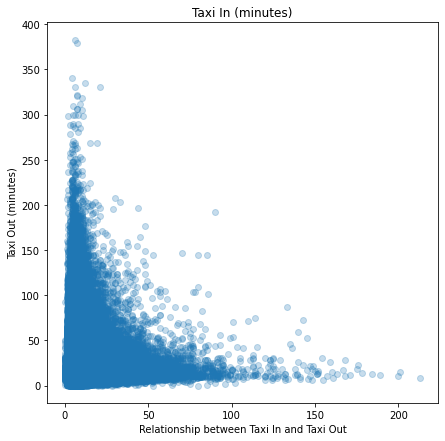

In [ ]:
#Define plot
plt.figure(figsize=(7,7))
plt.scatter(data=df2008.query('Cancelled==0'),x='TaxiIn',y='TaxiOut',alpha=1/4)
chart_labels('Relationship between Taxi In and Taxi Out','Taxi In (minutes)','Taxi Out (minutes)')

> There is no linear relationship between Taxi In and Taxi Out

We found a linear relationship between departure and arrival delays. No such relationship was found between Carrier Delay and taxi out time.
No such relationship between Day Of Week and Departure Delay .



## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

13) Does the number of flights to destinations have an effect on arrival delays?

In [ ]:
#Creating two series that groups by destination and gets number of flights and average arrival delay for each destination
group_destination=df2008.groupby('Dest').size().sort_values(ascending=False)
group_arrival=df2008.groupby('Dest')['ArrDelay'].mean()

In [ ]:
#Create a dataframe of top 50 busiest airports and average arrival delays for each by destination
delay_destination=pd.concat([group_destination,group_arrival],axis=1).reset_index()
delay_destination.columns=['Dest','FlightNum','avg_arrival_delay']

In [ ]:
#Sorting number of flight values by descending order (busiest destinations first)
delay_destination=delay_destination.sort_values('FlightNum',ascending=False)

In [ ]:
#Feature Engineering: Create a new column 'top_destinations' to create two groups: Top 50 and Rest
delay_destination['top_destinations']=np.nan

In [ ]:
#Setting new column for top 50 
delay_destination.iloc[:50,3]='Rank 1-50'

In [ ]:
#Setting new column for rest 
delay_destination.iloc[50:100,3]='Rank 51-100'

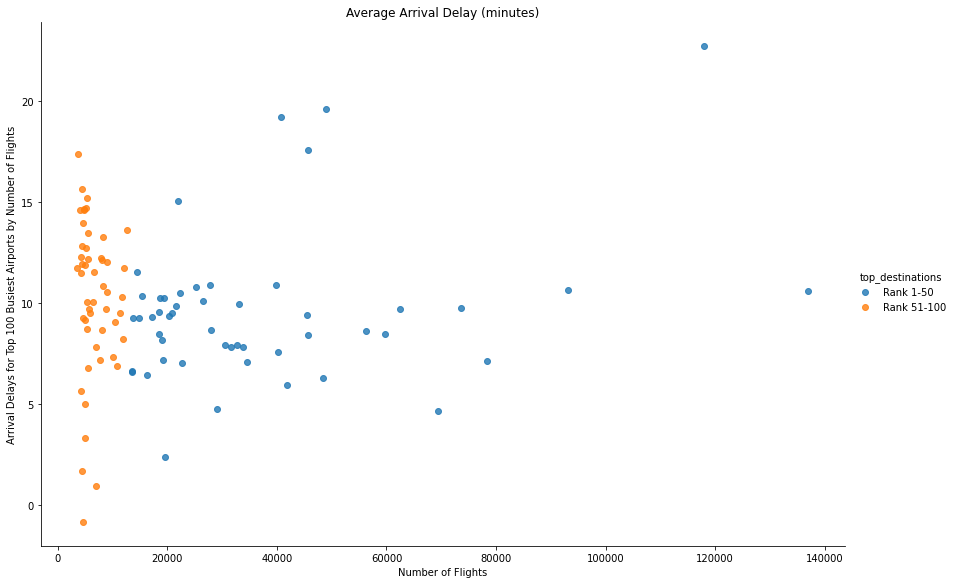

In [ ]:
#Define scatter plot with color used for ranking 
g=sb.FacetGrid(data=delay_destination,hue='top_destinations',hue_order=['Rank 1-50','Rank 51-100'],size=8,aspect=1.5)
g=g.map(sb.regplot,'FlightNum','avg_arrival_delay',x_jitter=0.4,fit_reg=False)
g.add_legend()
chart_labels('Number of Flights','Average Arrival Delay (minutes)','Arrival Delays for Top 100 Busiest Airports by Number of Flights')

> The graph above shows that for the top 50 busiest destinations, the number of flights does have an effect on average arrival delay. This is not so much true for less busy airports that rank from 51-100.

14) What is the relationship between flight Origin and mean Departure delay?

In [ ]:
#Creating two series that groups by Origin and gets number of flights and average Departure delay for each Origin
group_Origin=df2008.groupby('Origin').size().sort_values(ascending=False)
group_Departure=df2008.groupby('Origin')['DepDelay'].mean()

In [ ]:
#Pandas series with average Departure delay for each Origin
Origin_DepDelay=df2008.query('DepDelay>0').groupby('Origin')['DepDelay'].mean()

In [ ]:
#Create a dataframe of top 50 busiest airports and average Departure delay for each Origin
delay_Origin=pd.concat([group_Origin,group_Departure],axis=1).reset_index()
delay_Origin.columns=['Origin','FlightNum','Origin_DepDelay']

In [ ]:
#Sorting number of flight values by descending order (busiest Origin first)
delay_Origin=delay_Origin.sort_values('FlightNum',ascending=False)

In [ ]:
#Feature Engineering: Create a new column 'top_Origin' to create two groups: Top 50 and Rest
delay_Origin['top_Origin']=np.nan

In [ ]:
#Setting new column for top 50 
delay_Origin.iloc[:50,3]='Rank 1-50'

In [ ]:
#Setting new column for rest 
delay_Origin.iloc[50:100,3]='Rank 51-100'

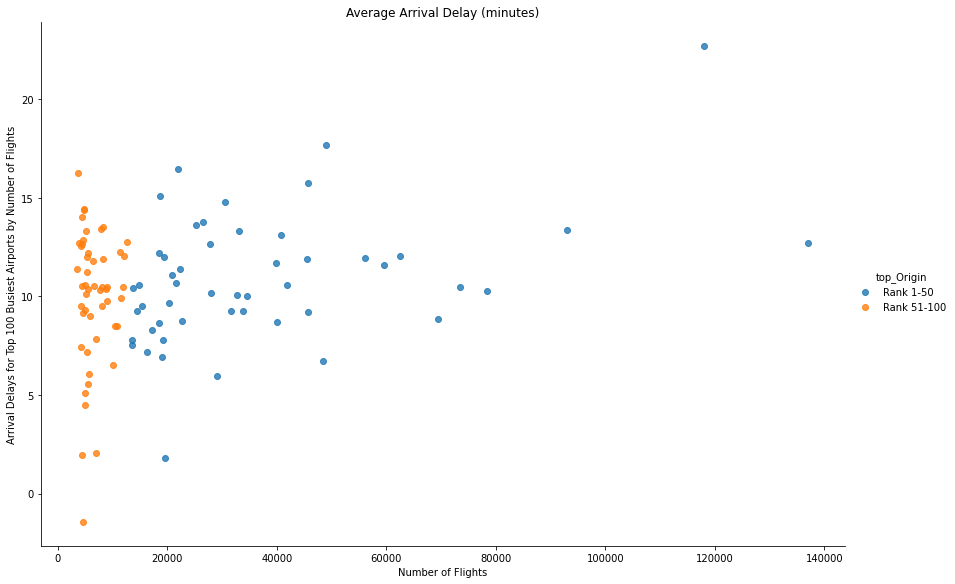

In [ ]:
#Define scatter plot with color used for ranking 
g=sb.FacetGrid(data=delay_Origin,hue='top_Origin',hue_order=['Rank 1-50','Rank 51-100'],size=8,aspect=1.5)
g=g.map(sb.regplot,'FlightNum','Origin_DepDelay',x_jitter=0.4,fit_reg=False)
g.add_legend()
chart_labels('Number of Flights','Average Arrival Delay (minutes)','Arrival Delays for Top 100 Busiest Airports by Number of Flights')

> The graph above shows that for the top 50 busiest Origin, the number of flights does have an effect on average Departure delay. This is not so much true for less busy airports that rank from 51-100.

15 ) What is the trend of each type of delay from month to month? Which type of delay contributes the most to flight delays? Is there a lot of variation in any of these?

In [ ]:
#Creating dataframes that will group each delay by month and calculate average delay for each
carrier_by_month=df2008.query('CarrierDelay>0').groupby('Month')['CarrierDelay'].mean().reset_index(name='CarrierDelay')
weather_by_month=df2008.query('WeatherDelay>0').groupby('Month')['WeatherDelay'].mean().reset_index(name='WeatherDelay')
nas_by_month=df2008.query('NASDelay>0').groupby('Month')['NASDelay'].mean().reset_index(name='NASDelay')
security_by_month=df2008.query('SecurityDelay>0').groupby('Month')['SecurityDelay'].mean().reset_index(name='SecurityDelay')
lateaircraft_by_month=df2008.query('LateAircraftDelay>0').groupby('Month')['LateAircraftDelay'].mean().reset_index(name='LateAircraftDelay')

In [ ]:
#Joining all these dataframes into one
temp=carrier_by_month.merge(weather_by_month,on='Month')
temp=temp.merge(nas_by_month,on='Month')
temp=temp.merge(security_by_month,on='Month')
delays_by_month=temp.merge(lateaircraft_by_month,on='Month')

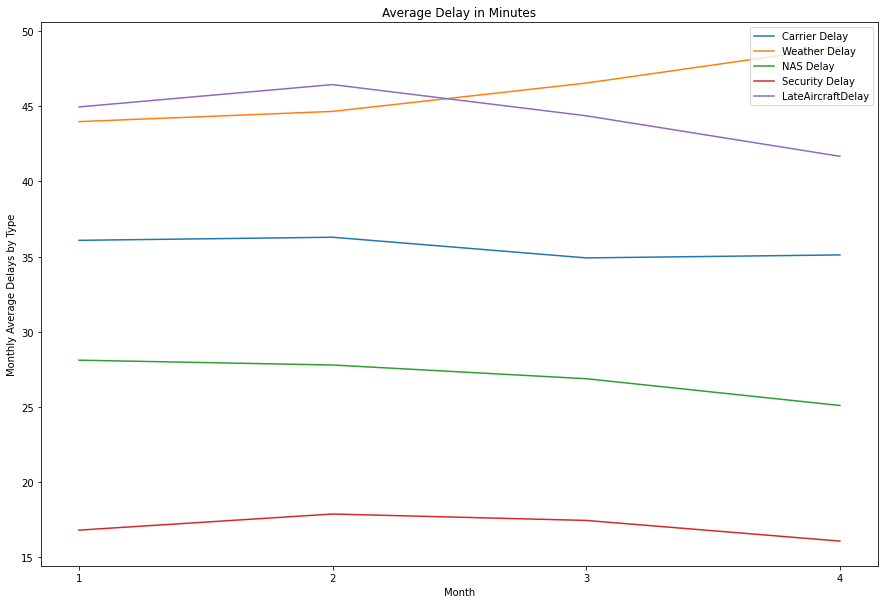

In [85]:
#Define line plot
plt.figure(figsize=(15,10))
plt.errorbar(x=delays_by_month.Month,y=delays_by_month.CarrierDelay,Label='Carrier Delay')
plt.errorbar(x=delays_by_month.Month,y=delays_by_month.WeatherDelay,Label='Weather Delay')
plt.errorbar(x=delays_by_month.Month,y=delays_by_month.NASDelay,Label='NAS Delay')
plt.errorbar(x=delays_by_month.Month,y=delays_by_month.SecurityDelay,Label='Security Delay')
plt.errorbar(x=delays_by_month.Month,y=delays_by_month.LateAircraftDelay,Label='LateAircraftDelay')
plt.legend(loc='upper right')
chart_labels('Month','Average Delay in Minutes','Monthly Average Delays by Type')
plt.xticks(delays_by_month.Month);

> From the graph above, it can be seen that both weather and aircraft related delays contribute more to overall delays as compared to others.
It can be also observed that there is large variation in delays for these from month to month.Delays due to security reasons is the least common with less variation.


## Conclusions
After analysis, we explored cancellation codes, carrier codes with cancellations and time of the year when cancellations were hightest.

Cancellation code "D" (Security) is very less as compared to other codes. This means there have been very few instances of delays/cancellations due to security reasons.

We also explored delays in departure and arrival of flights to understand their distribution. We had to transform the histogram for these by placing limits on x axis since most of the data is concentrated there.

To explore the carriers that had cancellations, we modified the original dataset and filtered only those rows that had cancellations (A,B,C or D). We would then be able to determine and observe cancellations by carriers.

To explore delays, we created new dataframes that excluded NaN (missing) values in delays to plot histogram.
We found a linear relationship between departure and arrival delays. No such relationship was found between Carrier Delay and taxi out time. No such relationship between Day Of Week and Departure Delay .

Multivariate analysis further supports the finding that weather conditions were the top reasons for delays. It can also be seen that longer flights with longer distances experience longer arrival (average) delays than shorter flights.
